PROJECT 2

PART (1) QUESTION (1.1) There are 4039 Nodes and 88234 Edges

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 75.6 MB/s eta 0:00:00


In [3]:
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

PART (1) QUESTION (1.2) The graph is connected:

In [4]:
path = '/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/facebook_combined.txt'

# Load file
data = np.loadtxt(path, dtype=int)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['source', 'target'])

# Create graph
g = igraph.Graph.DataFrame(df, directed=False)

# Print the graph summary
print(g.summary())

IGRAPH U--- 4039 88234 -- 


In [5]:
# Check if the graph is connected
if g.is_connected():
    print("The graph is connected!")
else:
    print("The graph is not connected!")
        # Get the size of the GCC
    gcc = g.clusters().giant()
    print("The size of the GCC is:", gcc.vcount())

The graph is connected!


PART 1 QUESTION (2)

In [6]:
# Find the diameter of the graph
diameter = g.diameter()
print("The diameter of the graph is:", diameter)

The diameter of the graph is: 8


PART 1 QUESTION (3)

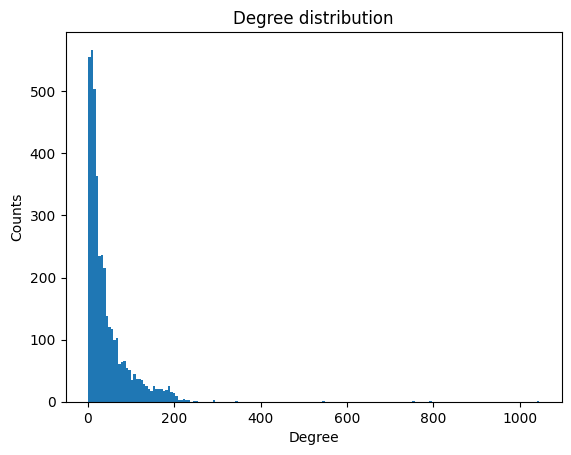

The average degree of the graph is: 43.69101262688784


In [7]:
# Compute the degree of each vertex in the graph
degree = g.degree()

# Compute the degree distribution
degree_dist = g.degree_distribution()

# Plot the degree distribution
plt.hist(degree, 'auto')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Report the average degree
avg_degree = sum(degree) / len(degree)
print("The average degree of the graph is:", avg_degree)

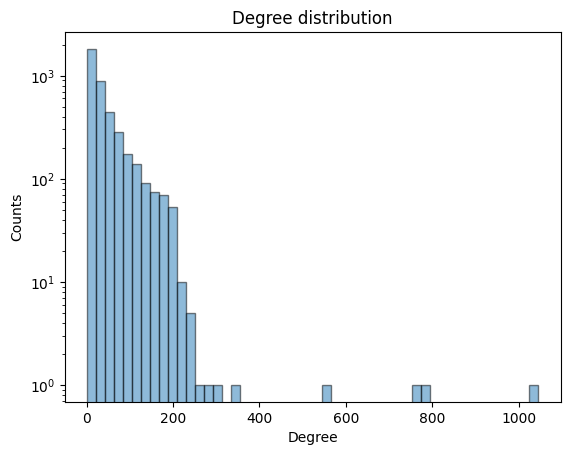

The slope of the power law fit is: 1.073464170641069


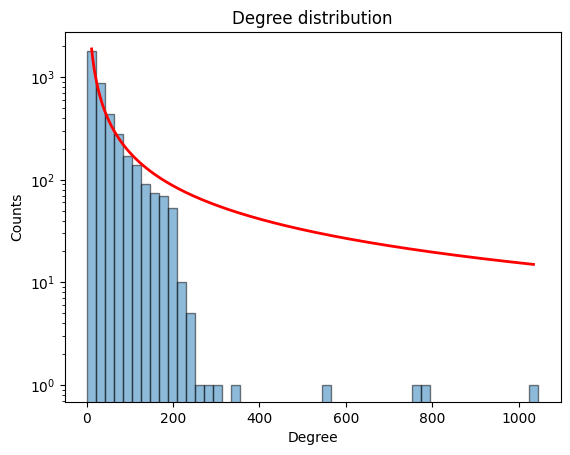

The slope of the linear fit is: -12.018667760004128


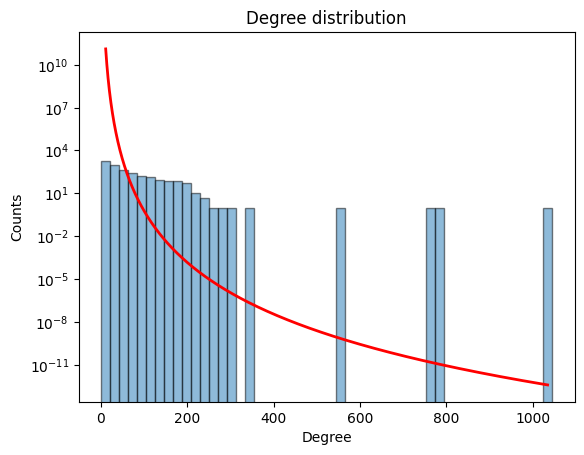

In [8]:
# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=50, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=50, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

# Define a power law function
def powerlaw(x, a, b):
    return a * x ** (-b)

# Fit a power law function to the plot
x = bins[:-1] + np.diff(bins) / 2
y = counts
popt, pcov = curve_fit(powerlaw, x, y)

# Estimate the slope of the power law fit
slope = popt[1]
print("The slope of the power law fit is:", slope)

# Plot the power law fit
xfit = np.linspace(min(x), max(x), 1000)
yfit = powerlaw(xfit, *popt)
plt.plot(xfit, yfit, 'r-', lw=2)

plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=50, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

counts[counts==0] = 0.0000000000001

# Fit a linear model to the log-transformed data
x = np.log(bins[:-1] + np.diff(bins) / 2)
y = np.log(counts)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
print("The slope of the linear fit is:", slope)

# Plot the linear fit
xfit = np.linspace(min(x), max(x), 1000)
yfit = slope * xfit + intercept
plt.plot(np.exp(xfit), np.exp(yfit), 'r-', lw=2)

plt.show()

-----------------PART 2--------------------------------

PART 2 QUESTION (5)

In [11]:
node_id = 0
node_neighbors = g.neighbors(node_id)
node_neighbors.append(node_id)
personalized_network = g.induced_subgraph(node_neighbors)

print(personalized_network.summary())

IGRAPH U--- 348 2866 -- 


There are 348 Nodes, and 2866 Edges.

PART 2 QUESTION (6)

In [12]:
diameter = personalized_network.diameter()
print(diameter)

2


The upper bound of the diameter is 2, since the network is defined as a node and it's immediate neighbors, then any 2 nodes will be connected by at most 2 edges through node 0.

For the lower bound, if node 0 is connected to all of its neighbors and all of its neighbors are connected to each other, then the lower bound of the diameter is 1.

PART 2 QUESTION (7)

For the upper bound, this would mean that their exists 2 nodes that are not connected to each other but are connected through node 0. So the shortest path between the nodes is 2 edges, making the diameter 2.

For the lower bound, it means that node 0 is directly connected to all of its neighbors, and all of its neighbors are directly connected to each other. The network would be a complete graph, and there is a direct path of length 1 between any two nodes in the personalized network.